In [1]:
import librosa
#import librosa.display
import numpy as np
#import matplotlib.pyplot as plt
import tensorflow as tf
#from matplotlib.pyplot import specgram
import pandas as pd
import os
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

/Users/lucaslyon/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/lucaslyon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
angryFiles = os.listdir('emotion_train_set/angry')

In [3]:
angryFiles[:5]

['.425_3.wav.icloud',
 '441_3.json',
 '.705_7.wav.icloud',
 '.91_2.wav.icloud',
 '210_3.json']

In [4]:
disgustFiles = os.listdir('emotion_train_set/disgust')

In [5]:
fearFiles = os.listdir('emotion_train_set/fear')

In [6]:
happyFiles = os.listdir('emotion_train_set/happy')

In [7]:
neutralFiles = os.listdir('emotion_train_set/neutral')

In [8]:
sadFiles = os.listdir('emotion_train_set/sad')

In [9]:
surpriseFiles = os.listdir('emotion_train_set/surprise')

In [10]:
angryFiles.sort()
disgustFiles.sort()
fearFiles.sort()
happyFiles.sort()
neutralFiles.sort()
sadFiles.sort()
surpriseFiles.sort()

In [11]:
import json

In [12]:
angryJSONFiles = os.listdir('emotion_train_set/angry')
angryJSONFiles.sort()
angryData=[]
for file in angryJSONFiles:
    try:
        with open('emotion_train_set/angry/'+file) as json_data:
            d = json.load(json_data)
            angryData.append(d['features'])
    except: pass

In [13]:
disgustJSONFiles = os.listdir('emotion_train_set/disgust')
disgustJSONFiles.sort()
disgustData=[]
for file in disgustJSONFiles:
    try:
        with open('emotion_train_set/disgust/'+file) as json_data:
            d = json.load(json_data)
            disgustData.append(d['features'])
    except: pass


In [14]:
fearJSONFiles = os.listdir('emotion_train_set/fear')
fearJSONFiles.sort()
fearData=[]
for file in fearJSONFiles:
    try:
        with open('emotion_train_set/fear/'+file) as json_data:
            d = json.load(json_data)
            fearData.append(d['features'])
    except: pass

In [15]:
happyJSONFiles = os.listdir('emotion_train_set/happy')
happyJSONFiles.sort()
happyData=[]
for file in happyJSONFiles:
    try:
        with open('emotion_train_set/happy/'+file) as json_data:
            d = json.load(json_data)
            happyData.append(d['features'])
    except: pass

In [16]:
neutralJSONFiles = os.listdir('emotion_train_set/neutral')
neutralJSONFiles.sort()
neutralData=[]
for file in neutralJSONFiles:
    try:
        with open('emotion_train_set/neutral/'+file) as json_data:
            d = json.load(json_data)
            neutralData.append(d['features'])
    except: pass

In [17]:
sadJSONFiles = os.listdir('emotion_train_set/sad')
sadJSONFiles.sort()
sadData=[]
for file in sadJSONFiles:
    try:
        with open('emotion_train_set/sad/'+file) as json_data:
            d = json.load(json_data)
            sadData.append(d['features'])
    except: pass

In [18]:
surpriseJSONFiles = os.listdir('emotion_train_set/surprise')
surpriseJSONFiles.sort()
surpriseData=[]
for file in surpriseJSONFiles:
    try:
        with open('emotion_train_set/surprise/'+file) as json_data:
            d = json.load(json_data)
            surpriseData.append(d['features'])
    except: pass

In [19]:
angryDf = pd.DataFrame(angryData)
disgustDf = pd.DataFrame(disgustData)
fearDf = pd.DataFrame(fearData)
happyDf = pd.DataFrame(happyData)
neutralDf = pd.DataFrame(neutralData)
sadDf = pd.DataFrame(sadData)
surpriseDf = pd.DataFrame(surpriseData)

In [20]:
angryDf['label'] = 'angry'
disgustDf['label'] = 'disgust'
fearDf['label'] = 'fear'
happyDf['label'] = 'happy'
neutralDf['label'] = 'neutral'
sadDf['label'] = 'sad'
surpriseDf['label'] = 'surprise'

In [21]:
emotionsDf = pd.concat([angryDf, disgustDf, fearDf, happyDf, neutralDf, sadDf, surpriseDf])

In [22]:
from sklearn.utils import shuffle
shuffledEmotionsDf = shuffle(emotionsDf)

In [23]:
divider = np.random.rand(len(shuffledEmotionsDf)) < 0.85
train = shuffledEmotionsDf[divider]
test = shuffledEmotionsDf[~divider]

In [24]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]

In [25]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [26]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/Users/lucaslyon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
X_train.shape

(5722, 272)

In [28]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(272,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 272, 128)          768       
_________________________________________________________________
activation_1 (Activation)    (None, 272, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 272, 128)          82048     
_________________________________________________________________
activation_2 (Activation)    (None, 272, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 272, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 34, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 34, 128)           82048     
__________

In [30]:
print('Pad sequences')
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

Pad sequences


In [31]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [32]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=1000, validation_data=(x_testcnn, y_test))

Train on 5722 samples, validate on 996 samples
Epoch 1/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 2.0725 - acc: 0.2253 - val_loss: 1.6651 - val_acc: 0.3022
Epoch 2/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.8688 - acc: 0.2396 - val_loss: 1.6568 - val_acc: 0.3112
Epoch 3/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.8010 - acc: 0.2386 - val_loss: 1.6681 - val_acc: 0.2912
Epoch 4/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.7518 - acc: 0.2604 - val_loss: 1.6575 - val_acc: 0.3072
Epoch 5/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.7246 - acc: 0.2723 - val_loss: 1.6494 - val_acc: 0.3253
Epoch 6/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.7137 - acc: 0.2665 - val_loss: 1.6288 - val_acc: 0.3404
Epoch 7/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.7034 - acc: 0.2812 - val_loss: 1.6276 - val_acc: 0

5722/5722 [==============================] - 12s 2ms/step - loss: 1.5852 - acc: 0.3483 - val_loss: 1.6057 - val_acc: 0.3504
Epoch 61/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.5858 - acc: 0.3446 - val_loss: 1.6111 - val_acc: 0.3514
Epoch 62/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.5853 - acc: 0.3474 - val_loss: 1.6069 - val_acc: 0.3544
Epoch 63/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.5845 - acc: 0.3509 - val_loss: 1.5963 - val_acc: 0.3534
Epoch 64/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.5900 - acc: 0.3518 - val_loss: 1.6187 - val_acc: 0.3444
Epoch 65/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.5805 - acc: 0.3459 - val_loss: 1.6094 - val_acc: 0.3404
Epoch 66/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.5819 - acc: 0.3471 - val_loss: 1.6127 - val_acc: 0.3454
Epoch 67/1000
5722/5722 [=======================

5722/5722 [==============================] - 12s 2ms/step - loss: 1.4784 - acc: 0.4114 - val_loss: 1.6949 - val_acc: 0.3173
Epoch 179/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4833 - acc: 0.4055 - val_loss: 1.7174 - val_acc: 0.3032
Epoch 180/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4773 - acc: 0.4109 - val_loss: 1.7007 - val_acc: 0.3112
Epoch 181/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4709 - acc: 0.4098 - val_loss: 1.6974 - val_acc: 0.3122
Epoch 182/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4755 - acc: 0.4110 - val_loss: 1.7187 - val_acc: 0.3012
Epoch 183/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4718 - acc: 0.4182 - val_loss: 1.7268 - val_acc: 0.2912
Epoch 184/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4770 - acc: 0.4096 - val_loss: 1.7602 - val_acc: 0.2721
Epoch 185/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 1.4177 - acc: 0.4451 - val_loss: 1.8111 - val_acc: 0.2681
Epoch 238/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4229 - acc: 0.4383 - val_loss: 1.8489 - val_acc: 0.2520
Epoch 239/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4201 - acc: 0.4357 - val_loss: 1.7865 - val_acc: 0.2751
Epoch 240/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4164 - acc: 0.4444 - val_loss: 1.8534 - val_acc: 0.2460
Epoch 241/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4173 - acc: 0.4380 - val_loss: 1.8137 - val_acc: 0.2671
Epoch 242/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4111 - acc: 0.4460 - val_loss: 1.8028 - val_acc: 0.2751
Epoch 243/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.4173 - acc: 0.4456 - val_loss: 1.7831 - val_acc: 0.2691
Epoch 244/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 1.3555 - acc: 0.4724 - val_loss: 1.9960 - val_acc: 0.2028
Epoch 297/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.3509 - acc: 0.4764 - val_loss: 1.9039 - val_acc: 0.2410
Epoch 298/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.3510 - acc: 0.4708 - val_loss: 1.9996 - val_acc: 0.2189
Epoch 299/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.3530 - acc: 0.4783 - val_loss: 1.9649 - val_acc: 0.2249
Epoch 300/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.3603 - acc: 0.4656 - val_loss: 1.8362 - val_acc: 0.2570
Epoch 301/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.3515 - acc: 0.4703 - val_loss: 1.9079 - val_acc: 0.2540
Epoch 302/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.3478 - acc: 0.4755 - val_loss: 2.0060 - val_acc: 0.2139
Epoch 303/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 1.2879 - acc: 0.5031 - val_loss: 1.9962 - val_acc: 0.2309
Epoch 356/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.2781 - acc: 0.5103 - val_loss: 2.1634 - val_acc: 0.1918
Epoch 357/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.2763 - acc: 0.5066 - val_loss: 2.0797 - val_acc: 0.2018
Epoch 358/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.2764 - acc: 0.5168 - val_loss: 2.1845 - val_acc: 0.1807
Epoch 359/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.2790 - acc: 0.5093 - val_loss: 2.0592 - val_acc: 0.2078
Epoch 360/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.2691 - acc: 0.5124 - val_loss: 2.0358 - val_acc: 0.2259
Epoch 361/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.2786 - acc: 0.5052 - val_loss: 2.0617 - val_acc: 0.2199
Epoch 362/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 1.2055 - acc: 0.5470 - val_loss: 2.1836 - val_acc: 0.1908
Epoch 415/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1967 - acc: 0.5510 - val_loss: 2.3595 - val_acc: 0.1536
Epoch 416/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1989 - acc: 0.5432 - val_loss: 2.2908 - val_acc: 0.1697
Epoch 417/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1924 - acc: 0.5482 - val_loss: 2.4959 - val_acc: 0.1436
Epoch 418/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1952 - acc: 0.5484 - val_loss: 2.4501 - val_acc: 0.1315
Epoch 419/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1912 - acc: 0.5426 - val_loss: 2.3133 - val_acc: 0.1777
Epoch 420/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1896 - acc: 0.5531 - val_loss: 2.3460 - val_acc: 0.1606
Epoch 421/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 1.1032 - acc: 0.5855 - val_loss: 2.5226 - val_acc: 0.1616
Epoch 474/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1165 - acc: 0.5779 - val_loss: 2.5994 - val_acc: 0.1386
Epoch 475/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1105 - acc: 0.5851 - val_loss: 2.4619 - val_acc: 0.1627
Epoch 476/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1085 - acc: 0.5804 - val_loss: 2.4501 - val_acc: 0.1616
Epoch 477/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1069 - acc: 0.5757 - val_loss: 2.4961 - val_acc: 0.1566
Epoch 478/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.1047 - acc: 0.5841 - val_loss: 2.6513 - val_acc: 0.1335
Epoch 479/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.0975 - acc: 0.5916 - val_loss: 2.3991 - val_acc: 0.1727
Epoch 480/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 1.0276 - acc: 0.6117 - val_loss: 2.7985 - val_acc: 0.1325
Epoch 533/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.0314 - acc: 0.6201 - val_loss: 2.6719 - val_acc: 0.1526
Epoch 534/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.0192 - acc: 0.6227 - val_loss: 2.7912 - val_acc: 0.1255
Epoch 535/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.0173 - acc: 0.6183 - val_loss: 2.6931 - val_acc: 0.1526
Epoch 536/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.0095 - acc: 0.6230 - val_loss: 2.9941 - val_acc: 0.1124
Epoch 537/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.0212 - acc: 0.6150 - val_loss: 2.8642 - val_acc: 0.1165
Epoch 538/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 1.0150 - acc: 0.6267 - val_loss: 2.5620 - val_acc: 0.1496
Epoch 539/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 0.9340 - acc: 0.6608 - val_loss: 2.6466 - val_acc: 0.1576
Epoch 592/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.9220 - acc: 0.6667 - val_loss: 3.2118 - val_acc: 0.1124
Epoch 593/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.9232 - acc: 0.6580 - val_loss: 2.9849 - val_acc: 0.1285
Epoch 594/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.9346 - acc: 0.6498 - val_loss: 2.7048 - val_acc: 0.1586
Epoch 595/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.9157 - acc: 0.6666 - val_loss: 2.9065 - val_acc: 0.1365
Epoch 596/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.9240 - acc: 0.6589 - val_loss: 2.9774 - val_acc: 0.1295
Epoch 597/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.9159 - acc: 0.6585 - val_loss: 2.6570 - val_acc: 0.1657
Epoch 598/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 0.8415 - acc: 0.6942 - val_loss: 2.9107 - val_acc: 0.1576
Epoch 651/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.8407 - acc: 0.6873 - val_loss: 2.8882 - val_acc: 0.1576
Epoch 652/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.8342 - acc: 0.6973 - val_loss: 2.8352 - val_acc: 0.1496
Epoch 653/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.8398 - acc: 0.6924 - val_loss: 3.2480 - val_acc: 0.1124
Epoch 654/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.8343 - acc: 0.6936 - val_loss: 3.1085 - val_acc: 0.1335
Epoch 655/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.8274 - acc: 0.6975 - val_loss: 3.0812 - val_acc: 0.1275
Epoch 656/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.8374 - acc: 0.6931 - val_loss: 2.9379 - val_acc: 0.1486
Epoch 657/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 0.7470 - acc: 0.7289 - val_loss: 3.3141 - val_acc: 0.1295
Epoch 710/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.7472 - acc: 0.7317 - val_loss: 3.2613 - val_acc: 0.1345
Epoch 711/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.7571 - acc: 0.7270 - val_loss: 3.1688 - val_acc: 0.1496
Epoch 712/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.7451 - acc: 0.7289 - val_loss: 3.3129 - val_acc: 0.1355
Epoch 713/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.7470 - acc: 0.7274 - val_loss: 3.7497 - val_acc: 0.1034
Epoch 714/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.7467 - acc: 0.7242 - val_loss: 3.1460 - val_acc: 0.1355
Epoch 715/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.7433 - acc: 0.7349 - val_loss: 3.6981 - val_acc: 0.0984
Epoch 716/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 0.6501 - acc: 0.7730 - val_loss: 3.4094 - val_acc: 0.1315
Epoch 769/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.6738 - acc: 0.7595 - val_loss: 3.4460 - val_acc: 0.1335
Epoch 770/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.6508 - acc: 0.7698 - val_loss: 3.2443 - val_acc: 0.1466
Epoch 771/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.6639 - acc: 0.7616 - val_loss: 3.5417 - val_acc: 0.1335
Epoch 772/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.6580 - acc: 0.7667 - val_loss: 3.4070 - val_acc: 0.1365
Epoch 773/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.6627 - acc: 0.7651 - val_loss: 3.3237 - val_acc: 0.1486
Epoch 774/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.6645 - acc: 0.7623 - val_loss: 3.6083 - val_acc: 0.1315
Epoch 775/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 0.5812 - acc: 0.7985 - val_loss: 3.2667 - val_acc: 0.1667
Epoch 828/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5751 - acc: 0.8002 - val_loss: 3.5861 - val_acc: 0.1466
Epoch 829/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5912 - acc: 0.7856 - val_loss: 3.5265 - val_acc: 0.1406
Epoch 830/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5863 - acc: 0.7988 - val_loss: 3.6738 - val_acc: 0.1376
Epoch 831/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5870 - acc: 0.7952 - val_loss: 3.6490 - val_acc: 0.1406
Epoch 832/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5737 - acc: 0.8027 - val_loss: 3.4543 - val_acc: 0.1446
Epoch 833/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5683 - acc: 0.8023 - val_loss: 3.6834 - val_acc: 0.1365
Epoch 834/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 0.5136 - acc: 0.8196 - val_loss: 3.2325 - val_acc: 0.1847
Epoch 887/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5030 - acc: 0.8228 - val_loss: 3.9209 - val_acc: 0.1295
Epoch 888/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5041 - acc: 0.8252 - val_loss: 4.3262 - val_acc: 0.1064
Epoch 889/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5155 - acc: 0.8149 - val_loss: 3.2925 - val_acc: 0.1847
Epoch 890/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5085 - acc: 0.8207 - val_loss: 3.8846 - val_acc: 0.1396
Epoch 891/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.4964 - acc: 0.8317 - val_loss: 3.4476 - val_acc: 0.1687
Epoch 892/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.5032 - acc: 0.8307 - val_loss: 3.8087 - val_acc: 0.1386
Epoch 893/1000
5722/5722 [================

5722/5722 [==============================] - 12s 2ms/step - loss: 0.4454 - acc: 0.8544 - val_loss: 4.0487 - val_acc: 0.1365
Epoch 946/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.4353 - acc: 0.8541 - val_loss: 4.2088 - val_acc: 0.1245
Epoch 947/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.4365 - acc: 0.8483 - val_loss: 4.1489 - val_acc: 0.1365
Epoch 948/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.4413 - acc: 0.8494 - val_loss: 3.9367 - val_acc: 0.1396
Epoch 949/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.4344 - acc: 0.8534 - val_loss: 3.9348 - val_acc: 0.1496
Epoch 950/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.4328 - acc: 0.8539 - val_loss: 3.8358 - val_acc: 0.1496
Epoch 951/1000
5722/5722 [==============================] - 12s 2ms/step - loss: 0.4143 - acc: 0.8600 - val_loss: 3.8044 - val_acc: 0.1526
Epoch 952/1000
5722/5722 [================

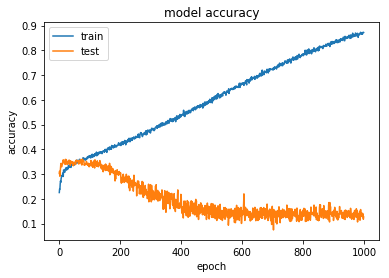

In [38]:
import matplotlib.pyplot as plt
#sigmoid
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
import pydot

In [3]:
from keras.utils import plot_model
from keras.models import load_model
import os
model = load_model('full_model.h5') #loading
plot_model(model, to_file='modelPrebuilt.png')

score = model.evaluate(x_testcnn, y_test, verbose=0)
print("test loss:", score[0])
print("test accuracy:", score[1])
from keras.models import load_model
#model.save('full_model.h5') #saving


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.